# Tracking Near-Earth Objects (NEOs): Exploratory Data Analysis

## Introduction:

Near-Earth Objects are celestial bodies such as asteriods and comets that pass close to Earth's orbit. While many of these objects are harmless, some of them can pose potential threat, which makes it essential to monitor and analyze these NEOs and their characteristics. The Near-Earth Object Web Service (NeoWs), NASA provides detailed information on objects that come close to the Earth's orbit. This enables researchers to assess their behaviour and any potential threat that they pose. This project delves into Exploratory data analysis (EDA) and hypothesis testing to better understand the factors tha affect the hazardousness of these objects.

## Objective:<br/>
The pimary objective of the project is to:<br/>
    1. Analyse the relationship between key characteristics of NEOs, such as their size, relative velocity and hazardous classification.<br/>
    2. Identify clusters or patterns within the dataset on the basis of the key features.<br/>
    3. Build predictive model to identify potentially hazardous NEOs using their defining attributes.<br/>



## Data Collection: 
For this project, I obtained a dataset from NASA that provides detailed information about the NEOs and their approximate distance from Earth. The data is extracted via the NASA API for the month of January 2023. Due to the API's 7 days data fetch limit, the data is collected in 4 separate chunks, each corresponding to 7-day period in the month of January 2023. These chunks are then, merged to form a complete dataset for the entire month of January.

Source: NASA Asteroids NeoWs (Near Earth Object Web Service)
Time Period: January 2023

In [317]:
import requests  # Import the requests module to make HTTP requests
import json      # Import the json module to handle JSON data
import pandas as pd
# NASA API Key
api_key = '43CeF9mMNkbz8M1IhqOEYi3ici40QBdXXT2IXwMX'

# Function to make a request to the NASA API and fetch the data
def get_nasa_data(start_date, end_date, api_key):
    try:
        # Base URL for NASA's API
        base_url = "https://api.nasa.gov/neo/rest/v1/feed"
        # Make the GET request to the NASA API with the specified parameters (date range and API key)
        request = requests.get(base_url, params={'start_date': start_date, 'end_date': end_date, 'api_key': api_key})

        # Check if the request was successful (status code 200)
        if request.status_code == 200:
           return request.json()  # Return the data as JSON
        else:
            print(f"data wasn't fetched for {start_date} to {end_date}, Status Code: {request.status_code}")
            return None
    except:
        print(f"An error occurred")
        return None

In [370]:
date_ranges = [
    ("2023-01-01", "2023-01-07"), ("2023-01-08", "2023-01-14"), ("2023-01-15", "2023-01-21"),
    ("2023-01-22", "2023-01-28"), ("2023-01-29", "2023-02-04"), ("2023-02-05", "2023-02-11"),
    ("2023-02-12", "2023-02-18"), ("2023-02-19", "2023-02-25"), ("2023-02-26", "2023-03-04"),
    ("2023-03-05", "2023-03-11"), ("2023-03-12", "2023-03-18"), ("2023-03-19", "2023-03-25"),
    ("2023-03-26", "2023-04-01"), ("2023-04-02", "2023-04-08"), ("2023-04-09", "2023-04-15"),
    ("2023-04-16", "2023-04-22"), ("2023-04-23", "2023-04-29"), ("2023-04-30", "2023-05-06"),
    ("2023-05-07", "2023-05-13"), ("2023-05-14", "2023-05-20"), ("2023-05-21", "2023-05-27"),
    ("2023-05-28", "2023-06-03"), ("2023-06-04", "2023-06-10"), ("2023-06-11", "2023-06-17"),
    ("2023-06-18", "2023-06-24"), ("2023-06-25", "2023-07-01"), ("2023-07-02", "2023-07-08"),
    ("2023-07-09", "2023-07-15"), ("2023-07-16", "2023-07-22"), ("2023-07-23", "2023-07-29"),
    ("2023-07-30", "2023-08-05"), ("2023-08-06", "2023-08-12"), ("2023-08-13", "2023-08-19"),
    ("2023-08-20", "2023-08-26"), ("2023-08-27", "2023-09-02"), ("2023-09-03", "2023-09-09"),
    ("2023-09-10", "2023-09-16"), ("2023-09-17", "2023-09-23"), ("2023-09-24", "2023-09-30"),
    ("2023-10-01", "2023-10-07"), ("2023-10-08", "2023-10-14"), ("2023-10-15", "2023-10-21"),
    ("2023-10-22", "2023-10-28"), ("2023-10-29", "2023-11-04"), ("2023-11-05", "2023-11-11"),
    ("2023-11-12", "2023-11-18"), ("2023-11-19", "2023-11-25"), ("2023-11-26", "2023-12-02"),
    ("2023-12-03", "2023-12-09"), ("2023-12-10", "2023-12-16"), ("2023-12-17", "2023-12-23"),
    ("2023-12-24", "2023-12-30"), ("2023-12-31", "2023-12-31")
]


# Initialize an empty list to hold the combined data for all 4 weeks
neo_data = []

# Loop through each date range, fetch the data and append it to the list
for start_date, end_date in date_ranges:
    data = get_nasa_data(start_date, end_date, api_key)
    if data:
        neo_data.append(data)  # Append data if fetched successfully
    else:
        print(f"No data found for {start_date} to {end_date}")

# Check if neo_data is not empty and then turn it into dataframe using pandas library
if neo_data:
    neo_df = pd.DataFrame(neo_data)
else:
    print("No data was retrieved for the given date ranges.")


print(neo_df)
neo_df.head()
print(neo_df['near_earth_objects'])


                                                links  element_count  \
0   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            113   
1   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            119   
2   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            107   
3   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            133   
4   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            129   
5   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            137   
6   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            145   
7   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            121   
8   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            139   
9   {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            142   
10  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            135   
11  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            169   
12  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...           

## Data Extraction and Transformation for NEOs
Now that, I have extracted the data from the NASA API and collected all the 4 weeks of data, I will tranform the raw JSON data into a structured format using Python's `pandas` library. The goal is to extract the key details about the NEOs (Near Earth Objects) and use them as variables.
The key variables chosen here are:
1. `id`: a unique identifier for each NEO
2. `name`: the name of the NEO
3. `absolute_magnitude_h`: the brightness of the NEO, which is an indicator of its size and reflectivity. The absolute magnitude H is a measure of the asteroid’s intrinsic mean brightness, estimated from measurements of its apparent magnitudes at the various times it has been observed, at various distances from the Sun and Earth, and at various phase angles. Also, since the actual shape of the asteroid is usually unknown, it is simply assumed to be spherical.
4. `estimated_diameter_min_km` & `estimated_diameter_max_km`: the minimun and maximum diameter of the NEO in kilometers.
5. `is_potentially_hazardous_asteroid`: the boolean value indicating whether the NEO is potentially hazardous or not.
6. `close_approach_date`: the date when the NEO makes its closest approach to the planet Earth. 
7. `miss_distance`: the distance between the NEO and Earth when the object makes its closest approach to Earth.
8. `relative_velocity`: the velocity of NEO relative to Earth during its closest approach.
9. `orbiting_body`: the celestial body that the NEO is orbiting, in this case it is planet Earth.
10. `is_sentry_object`: the boolean value indicating whether the object is monitored by NASA's Sentry System.

In [371]:
"""
extract the 'near_earth_objects' data to form the dataframe
"""

#initialize the neo_df as empty list to store the new data
df =[]

# create a loop through the NEO data
for each_week in neo_df['near_earth_objects']:
    for date, objects in each_week.items():
        for neo in objects:
            df.append({
                'Date': date, 'ID': neo['id'], 'Name': neo['name'], 'Abs_magnitude': neo['absolute_magnitude_h'], 'Min_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Max_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_max'], 'Potential_hazard': neo['is_potentially_hazardous_asteroid'], 
                'Close_approach_date': neo['close_approach_data'][0]['close_approach_date'], 'Relative_velocity': neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second'], 
                'Miss_distance': neo['close_approach_data'][0]['miss_distance']['astronomical'], 'Orbiting_body': neo['close_approach_data'][0]['orbiting_body'], 
                'Sentry_object': neo['is_sentry_object']
            })

df = pd.DataFrame(df)
print(df.head())


         Date       ID               Name  Abs_magnitude  Min_diameter  \
0  2023-01-01  2154347  154347 (2002 XK4)          16.08      1.616423   
1  2023-01-01  2385186  385186 (1994 AW1)          17.64      0.788052   
2  2023-01-01  2453309  453309 (2008 VQ4)          19.51      0.333085   
3  2023-01-01  3683468       (2014 QR295)          18.39      0.557898   
4  2023-01-01  3703782        (2015 AE45)          25.30      0.023150   

   Max_diameter  Potential_hazard Close_approach_date Relative_velocity  \
0      3.614431             False          2023-01-01     27.3921993676   
1      1.762138              True          2023-01-01     12.9241938417   
2      0.744801             False          2023-01-01       5.822172435   
3      1.247498             False          2023-01-01     16.1804693508   
4      0.051765             False          2023-01-01      6.8621510862   

  Miss_distance Orbiting_body  Sentry_object  
0  0.3312263376         Earth          False  
1  0.22328

## Data Preparation and Cleaning

### Handling the missing values 
Once we have converted the data into a dataframe, next we check for any missing values and the ways to address the issue.
Since, there are no missing values in the dataset, we can move ahead to other aspects of the data preparation.

In [372]:
# checking for any missing values in the dataframe
df.isnull().sum()

Date                   0
ID                     0
Name                   0
Abs_magnitude          0
Min_diameter           0
Max_diameter           0
Potential_hazard       0
Close_approach_date    0
Relative_velocity      0
Miss_distance          0
Orbiting_body          0
Sentry_object          0
dtype: int64

In [373]:
assert pd.notnull(df).all().all()

### Enriching the data 
To enrich the dataset by performing the following steps:
- Parsing Dates: The dates columns - `Date` and `Close_approach_date` are currently stored as strings. Now, we'll convert it into `datetime` object for better analysis.
- Extracting Data Features: The following are the additional features that we are adding into the dataframe-
    1. Relative Velocity (in km/s): `Relative_velocity_km_s`

### Parsing Dates
To convert `Date` and `Close_approach_date` columns into `datetime` format, we use `pd.to_datetime()

In [374]:
import datetime 

df['Date'] = pd.to_datetime(df['Date'])
df['Close_approach_date'] = pd.to_datetime(df['Close_approach_date'])

### Data Feature Engineering
In this step, we create new features to further enhance our analysis. The following features are derived from the existing columns and provide more details about the NEOs.
1. Date-based features: from the parsed dates, we derive the following 2 additional attributes:
    - Year: The year in which the NEO was observed.
    - Month: The month of observation, which is useful for identifying seasonal trends.
2. Relative Velocity (in km/s): this feature represents the relative velocity in kilometer/second. Doing so is essential since it is the standard unit for measuring speed in space and makes it easier to interpret the results.

In [375]:
df['Relative_velocity'] = pd.to_numeric(df['Relative_velocity'], errors='coerce')
df['Relative_velocity_km_s'] = df['Relative_velocity'] / 3600

In [376]:
df.head()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Relative_velocity_km_s
0,2023-01-01,2154347,154347 (2002 XK4),16.08,1.616423,3.614431,False,2023-01-01,27.392199,0.3312263376,Earth,False,0.007609
1,2023-01-01,2385186,385186 (1994 AW1),17.64,0.788052,1.762138,True,2023-01-01,12.924194,0.2232885314,Earth,False,0.003590
2,2023-01-01,2453309,453309 (2008 VQ4),19.51,0.333085,0.744801,False,2023-01-01,5.822172,0.2644821197,Earth,False,0.001617
3,2023-01-01,3683468,(2014 QR295),18.39,0.557898,1.247498,False,2023-01-01,16.180469,0.2629103243,Earth,False,0.004495
4,2023-01-01,3703782,(2015 AE45),25.30,0.023150,0.051765,False,2023-01-01,6.862151,0.0569979859,Earth,False,0.001906


In [377]:
df.tail()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Relative_velocity_km_s
7344,2023-12-31,54420282,(2024 AA4),20.32,0.229380,0.512909,True,2023-12-31,22.614793,0.2431986615,Earth,False,0.006282
7345,2023-12-31,54448115,(2024 MD),28.00,0.006677,0.014929,False,2023-12-31,7.001434,0.2338580171,Earth,True,0.001945
7346,2023-12-31,54456238,(2024 MZ1),23.69,0.048591,0.108653,False,2023-12-31,10.633127,0.2967107436,Earth,False,0.002954
7347,2023-12-31,54469547,(2024 RT9),21.74,0.119277,0.266710,False,2023-12-31,12.155930,0.1486521451,Earth,False,0.003377
7348,2023-12-31,54481742,(2024 SJ1),26.71,0.012094,0.027042,False,2023-12-31,11.689651,0.3723058765,Earth,False,0.003247


### Perform Exploratory Analysis
Exploring the data by taking a look at the data structure, descriptive statistics, distributions of the columns and the relationship between columns.

In [378]:
print(df.shape)

(7349, 13)


**Interpretation**
We can see that the dataset has 478 rows and 14 columns.

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    7349 non-null   datetime64[ns]
 1   ID                      7349 non-null   object        
 2   Name                    7349 non-null   object        
 3   Abs_magnitude           7349 non-null   float64       
 4   Min_diameter            7349 non-null   float64       
 5   Max_diameter            7349 non-null   float64       
 6   Potential_hazard        7349 non-null   bool          
 7   Close_approach_date     7349 non-null   datetime64[ns]
 8   Relative_velocity       7349 non-null   float64       
 9   Miss_distance           7349 non-null   object        
 10  Orbiting_body           7349 non-null   object        
 11  Sentry_object           7349 non-null   bool          
 12  Relative_velocity_km_s  7349 non-null   float64 

**Interpretation**:<br/>
We can see the data types of all the columns as well as the features engineered by us.
The column `Miss_distance` have the data type as object. We need to convert it into float data type.

In [380]:
df['Miss_distance'] = df['Miss_distance'].astype(float)

Dropping Unneccessary Columns

In [381]:
df = df.drop(['Name', 'Orbiting_body', 'Relative_velocity', 'Date'], axis = 1)
df.head()

,ID,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Miss_distance,Sentry_object,Relative_velocity_km_s
0,2154347,16.08,1.616423,3.614431,False,2023-01-01,0.331226,False,0.007609
1,2385186,17.64,0.788052,1.762138,True,2023-01-01,0.223289,False,0.003590
2,2453309,19.51,0.333085,0.744801,False,2023-01-01,0.264482,False,0.001617
3,3683468,18.39,0.557898,1.247498,False,2023-01-01,0.262910,False,0.004495
4,3703782,25.30,0.023150,0.051765,False,2023-01-01,0.056998,False,0.001906


In [382]:
df.describe()

,Abs_magnitude,Min_diameter,Max_diameter,Close_approach_date,Miss_distance,Relative_velocity_km_s
count,7349.000000,7349.000000,7349.000000,7349,7349.000000,7349.000000
mean,24.196869,0.089125,0.199290,2023-07-09 16:58:43.091577088,0.211572,0.003482
min,14.640000,0.000818,0.001828,2023-01-01 00:00:00,0.000067,0.000092
25%,22.360000,0.015508,0.034677,2023-04-06 00:00:00,0.059425,0.002104
50%,24.440000,0.034400,0.076920,2023-07-19 00:00:00,0.200386,0.003132
75%,26.170000,0.089651,0.200466,2023-10-11 00:00:00,0.345604,0.004549
max,32.560000,3.137292,7.015199,2023-12-31 00:00:00,0.499906,0.012730
std,2.718180,0.167579,0.374719,NaN,0.155190,0.001863


In [383]:
df.describe(include=('object','bool'))

,ID,Potential_hazard,Sentry_object
count,7349,7349,7349
unique,6499,2,2
top,54290521,False,False
freq,3,6889,6930


**Interpretation**

- `Abs_magnitude`:  
  The absolute magnitude (intrinsic brightness) ranges from **14.64** to **32.26**, with a mean of **24.25**.  
  - The lower the magnitude, the brighter and larger the NEOs are.  
  - The data shows a spread of both smaller and larger objects.

- `Min_diameter`:  
  The minimum diameter of NEOs varies from **0.000939 km** to **3.137 km**, with a mean of **0.0908 km**.  
  - This indicates a wide range in the size of NEOs.

- `Max_diameter`:  
  The maximum diameter ranges from **0.002099 km** to **7.015 km**, with a mean of **0.2029 km**.  
  - There's a significant variation in NEO sizes, suggests a mix of both small and much larger objects.

- `Close_approach_date`:  
  The close approach dates span from **January 1, 2023**, to **June 30, 2023**, indicating data from a **6-month period**.

- `Miss_distance`:  
  The closest approach distance ranges from **0.000067 AU** (extremely close) to **0.499906 AU** (relatively far).  
  - The average miss distance is **0.218 AU**, indicating that most NEOs pass at safe distances, but there are some closer passes as well.

---

<Axes: title={'center': 'Monthly trend in NEOs throughout the year'}, xlabel='Month'>

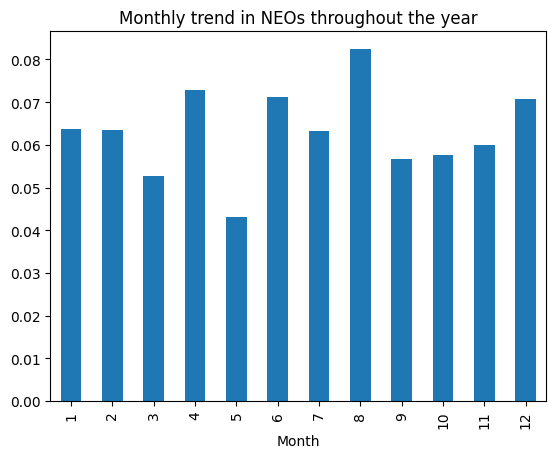

In [384]:
# Year and month from  parsed dates
df['Year'] = df['Close_approach_date'].dt.year
df['Month'] = df['Close_approach_date'].dt.month

# Example: Check for trends over months
df.groupby('Month')['Potential_hazard'].mean().plot(kind='bar', title='Monthly trend in NEOs throughout the year')

**Interpretation**


### Identify the outliers and handle them

In [385]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

num_df = df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s', 'Average_diameter', 'Kinetic_energy'], axis=1)
z_scores = zscore(df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s', 'Average_diameter', 'Kinetic_energy'], axis=1))
outlier_threshold = 3.0
outliers_mask = np.abs(z_scores) > outlier_threshold

print(num_df[outliers_mask.any(axis=1)])

      Abs_magnitude  Miss_distance  Min_diameter  Max_diameter  \
0             16.08       0.331226      1.616423      3.614431   
1             17.64       0.223289      0.788052      1.762138   
34            21.49       0.498085      0.133830      0.299254   
67            20.10       0.492122      0.253837      0.567597   
128           18.09       0.378900      0.640553      1.432320   
...             ...            ...           ...           ...   
7045          19.60       0.204952      0.319562      0.714562   
7055          19.64       0.204952      0.313729      0.701520   
7116          20.01       0.376393      0.264579      0.591616   
7163          21.14       0.078353      0.157237      0.351593   
7167          18.02       0.359449      0.661538      1.479245   

      Relative_velocity_km_s  
0                   0.007609  
1                   0.003590  
34                  0.009213  
67                  0.009441  
128                 0.002523  
...                  

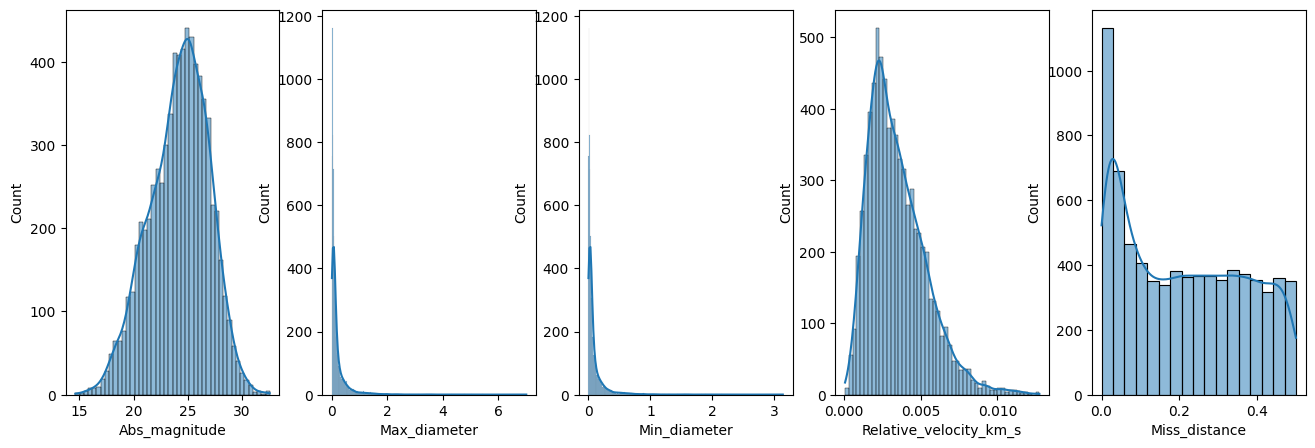

In [386]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(df['Max_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(df['Min_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(df['Miss_distance'], kde=True)

plt.show()

<Axes: ylabel='Miss_distance'>

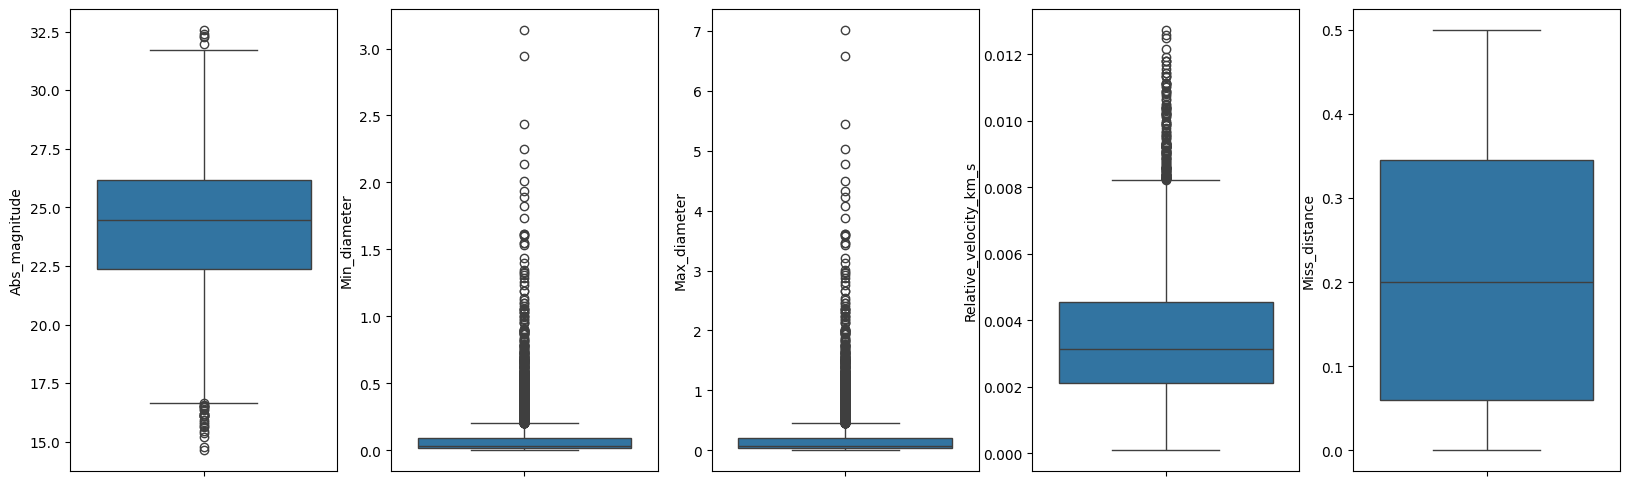

In [387]:
plt.figure(figsize=(20,6))
plt.subplot(1,5,1)
sns.boxplot(df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(df['Miss_distance'])

### Identify the outliers and handle them

In [388]:
percentile25 = df['Min_diameter'].quantile(0.25)
percentile75 = df['Max_diameter'].quantile(0.75)

iqr = percentile75 - percentile25
print(iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

0.1849576848
Upper limit 0.47790218289999997
Lower limit -0.2619285563


In [389]:
new_df = df[df['Max_diameter'] < upper_limit]
new_df.shape

(6598, 11)

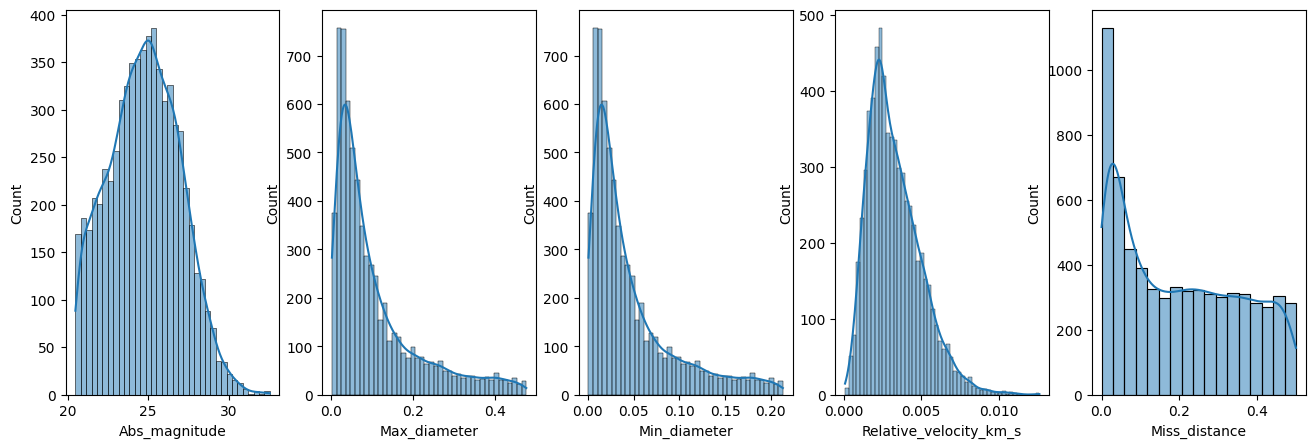

In [390]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(new_df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(new_df['Max_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(new_df['Min_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(new_df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(new_df['Miss_distance'], kde=True)

plt.show()

<Axes: ylabel='Miss_distance'>

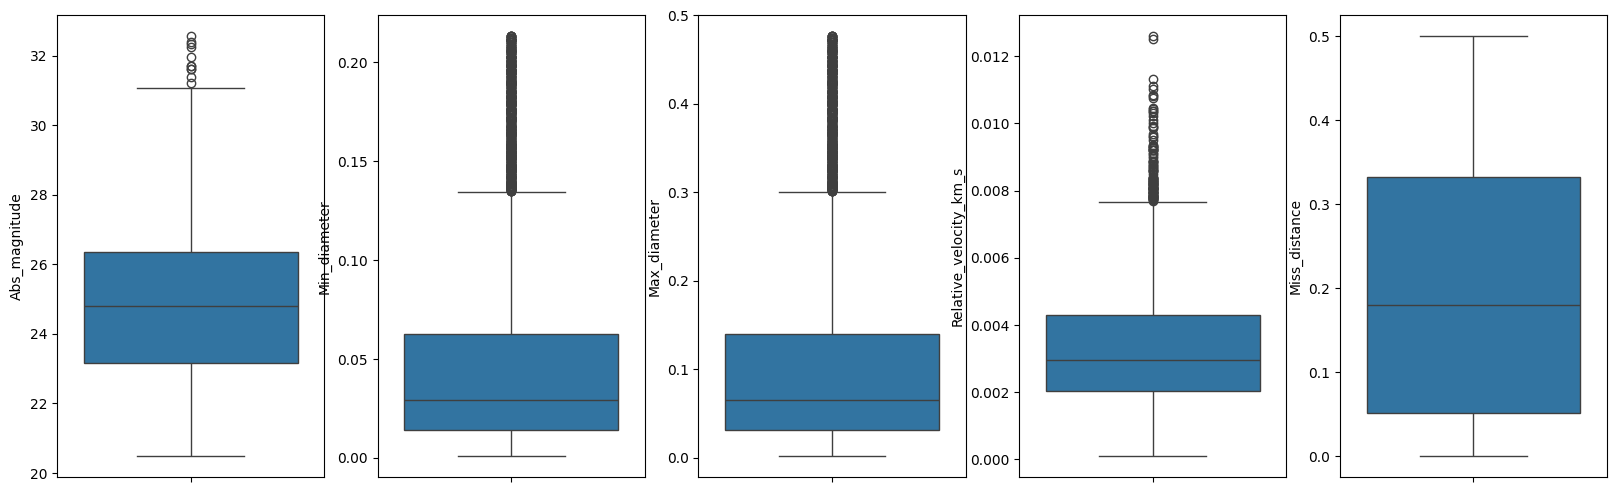

In [391]:
plt.figure(figsize=(20,6))
plt.subplot(1,5,1)
sns.boxplot(new_df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(new_df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(new_df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(new_df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(new_df['Miss_distance'])

In [392]:
new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr()


,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.000000,-0.269919,0.284210,0.284210,0.280407
Abs_magnitude,-0.269919,1.000000,-0.878647,-0.878647,-0.279515
Max_diameter,0.284210,-0.878647,1.000000,1.000000,0.288914
Min_diameter,0.284210,-0.878647,1.000000,1.000000,0.288914
Miss_distance,0.280407,-0.279515,0.288914,0.288914,1.000000


In [393]:
new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.0,-0.2699,0.2842,0.2842,0.2804
Abs_magnitude,-0.2699,1.0,-0.8786,-0.8786,-0.2795
Max_diameter,0.2842,-0.8786,1.0,1.0,0.2889
Min_diameter,0.2842,-0.8786,1.0,1.0,0.2889
Miss_distance,0.2804,-0.2795,0.2889,0.2889,1.0


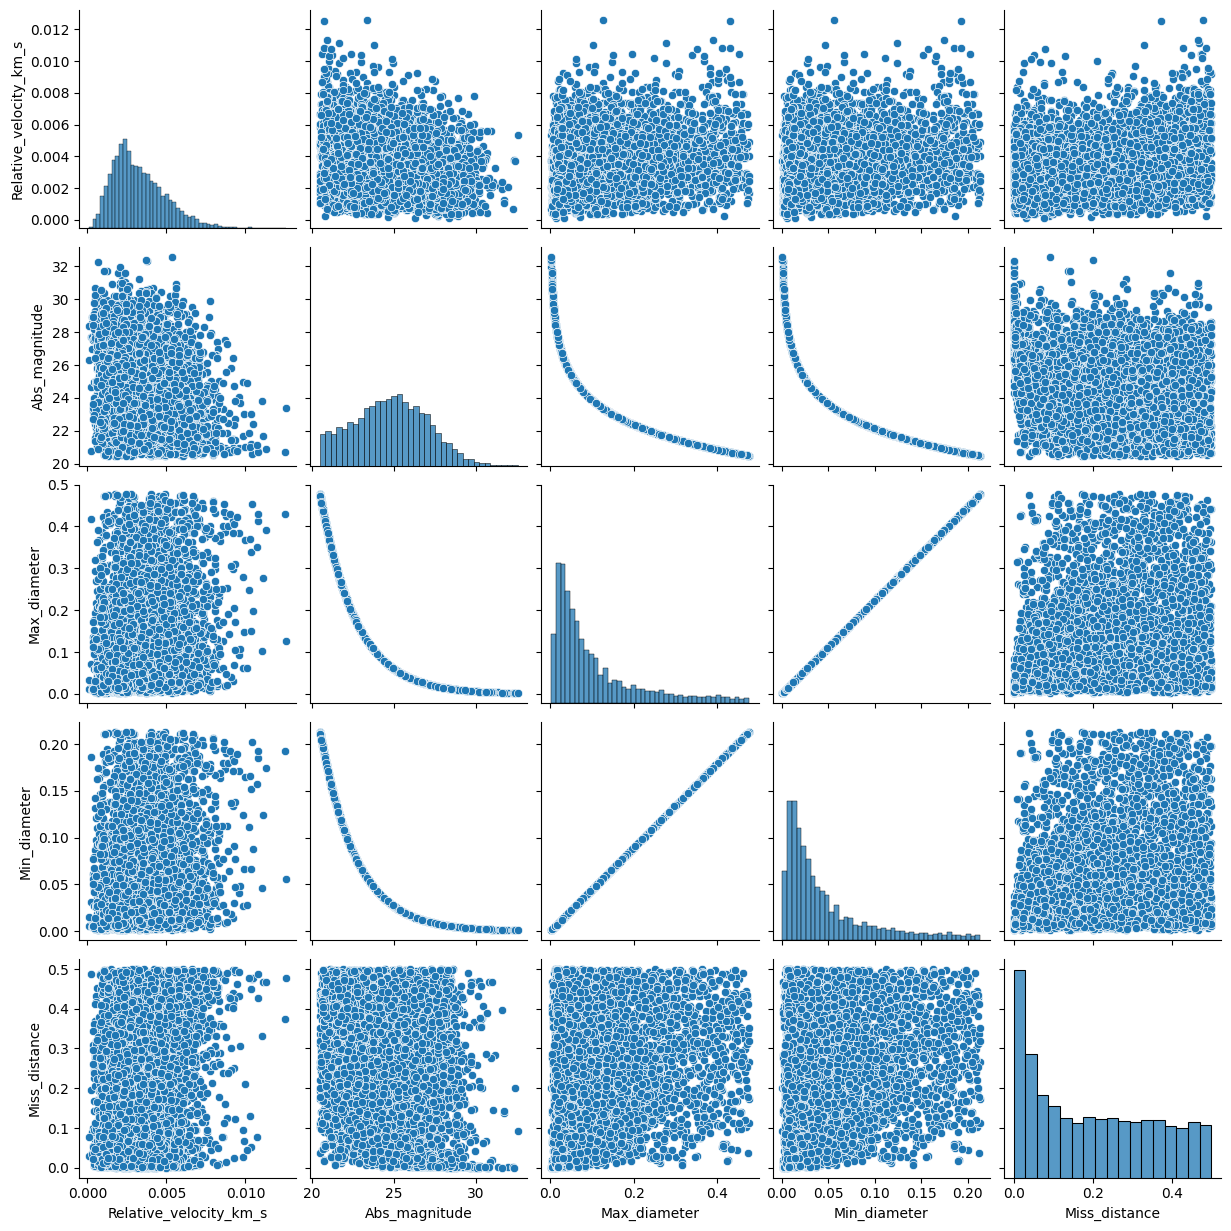

In [394]:
sns.pairplot(new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']])
plt.show()

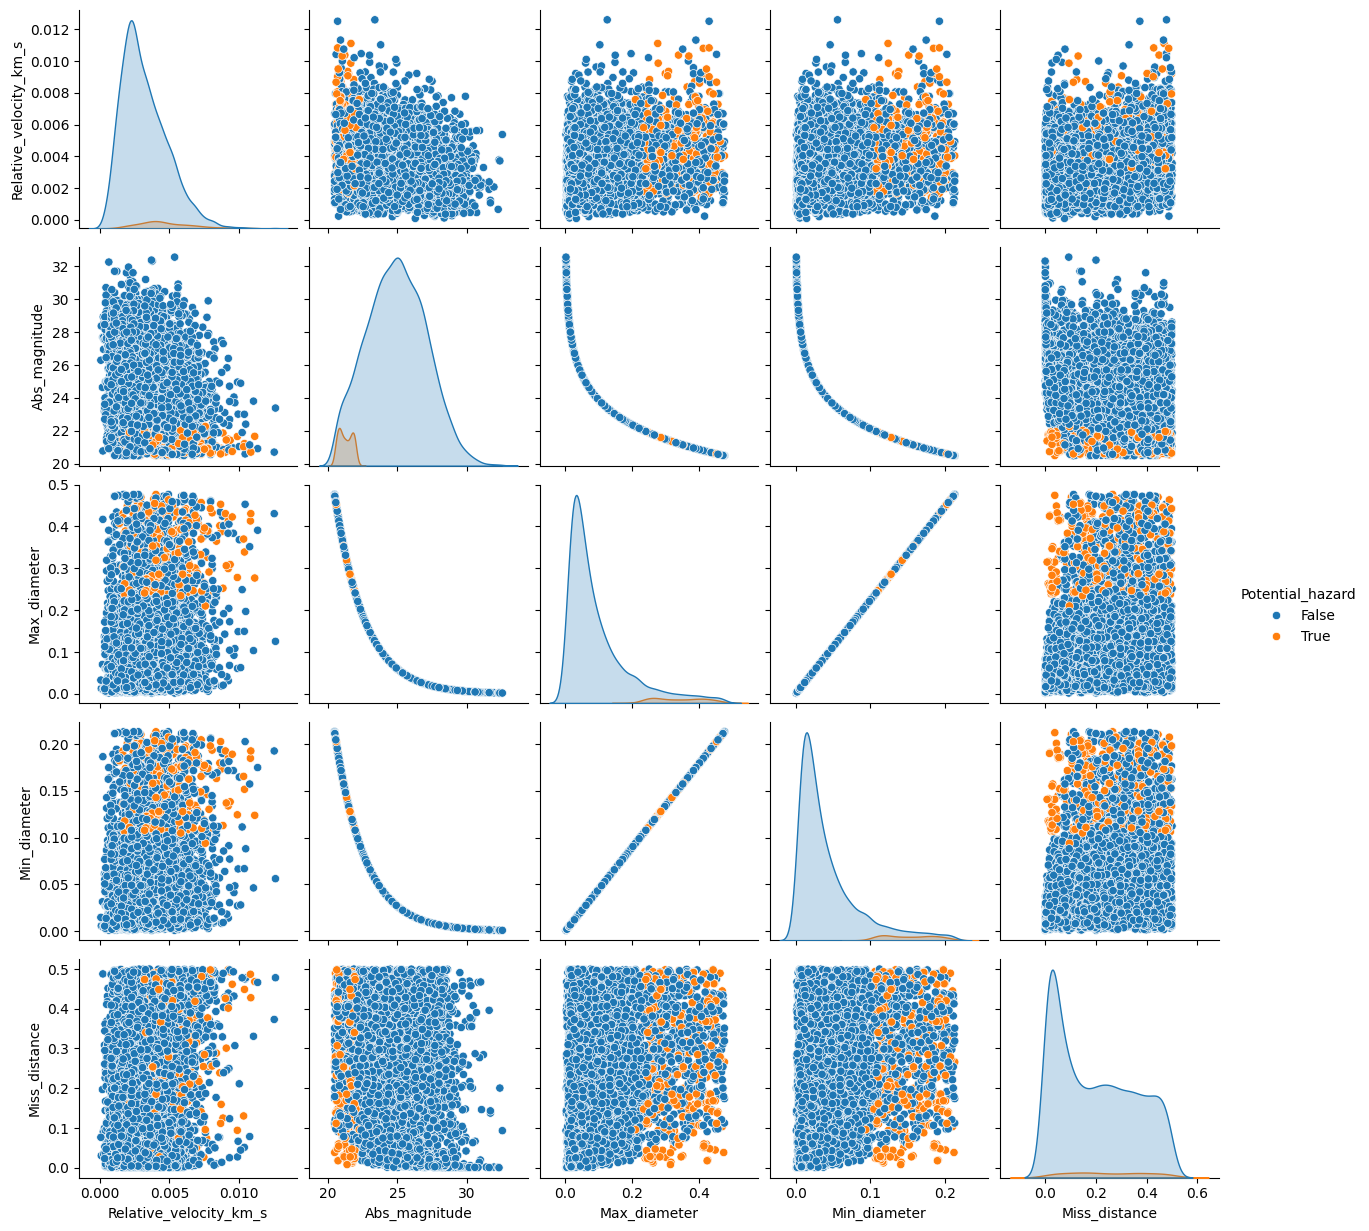

In [395]:
sns.pairplot(new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance','Potential_hazard']], hue="Potential_hazard")
plt.show()

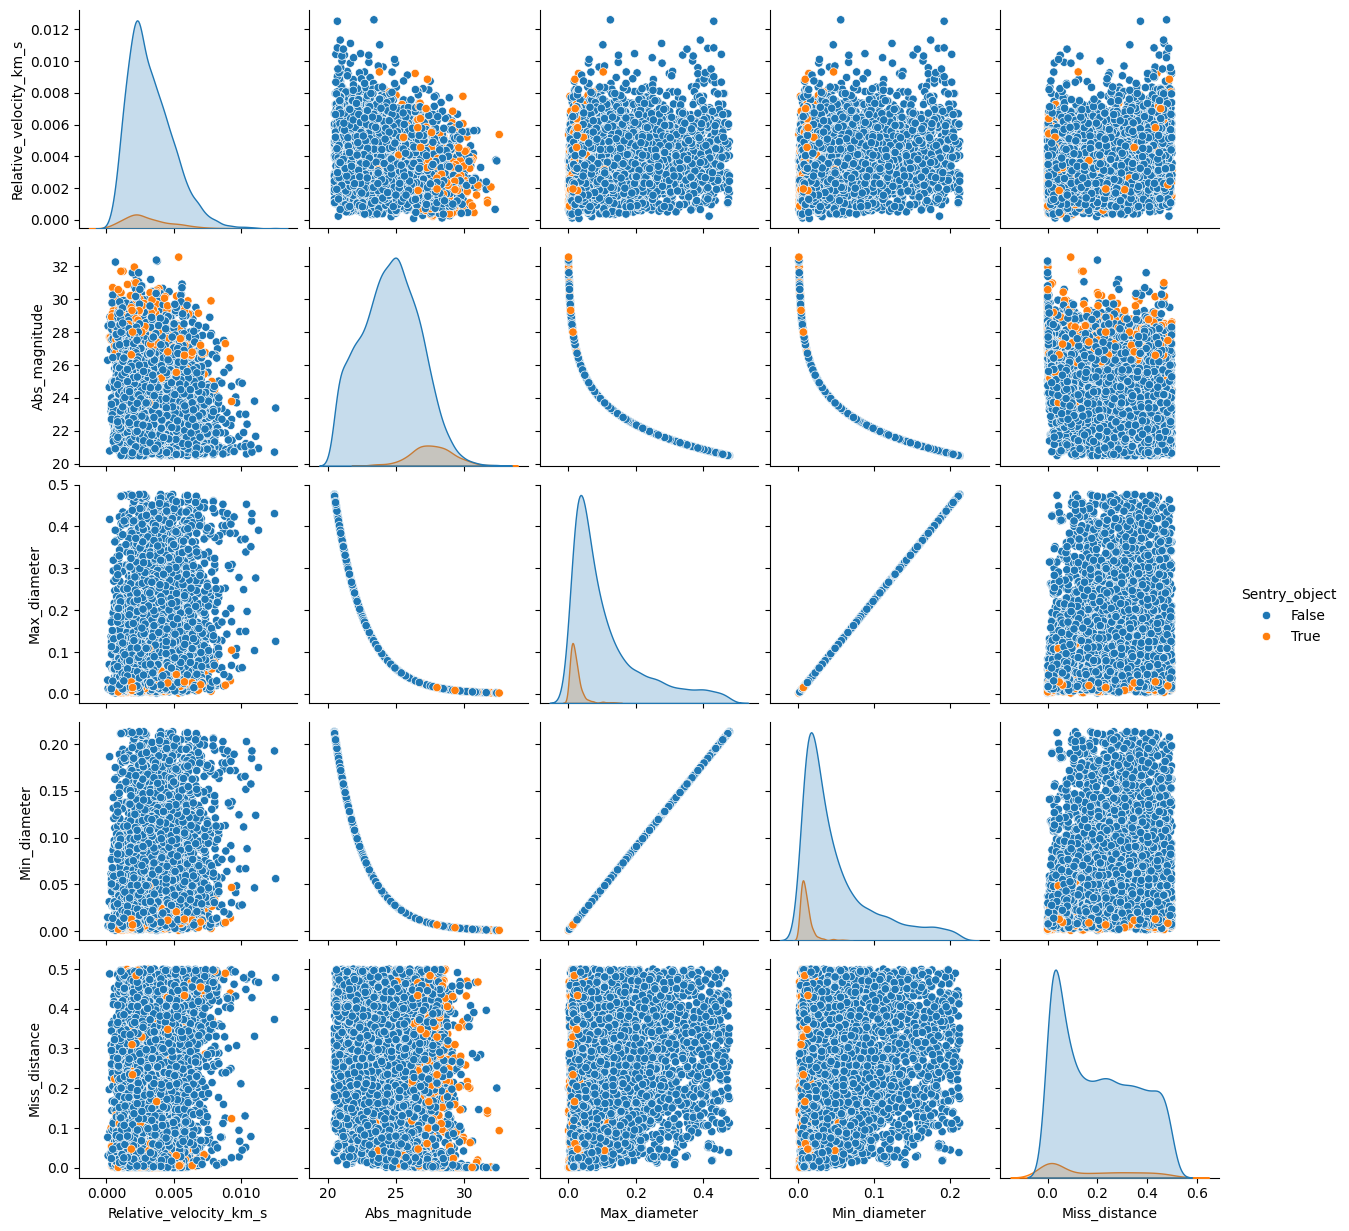

In [396]:
sns.pairplot(new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance','Sentry_object']], hue="Sentry_object")
plt.show()

### Encoding the features:

In this step, we are converting the `Potential_hazard` column and `Sentry_object` columns from boolean to binary (`1/0`) to help in easy processing while making machine learning models.

In [417]:
new_df['Potential_hazard'] = new_df['Potential_hazard'].astype(int)
new_df['Sentry_object'] = new_df['Sentry_object'].astype(int)

/var/folders/q_/xmq8fvms5377__kgzcwg9lkc0000gn/T/ipykernel_39777/2710656012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Potential_hazard'] = new_df['Potential_hazard'].astype(int)
/var/folders/q_/xmq8fvms5377__kgzcwg9lkc0000gn/T/ipykernel_39777/2710656012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentry_object'] = new_df['Sentry_object'].astype(int)


### Spliting the data using Stratified Sampling

In [418]:
new_df['Potential_hazard'].value_counts(normalize=True)*100

Potential_hazard
0    95.953319
1     4.046681
Name: proportion, dtype: float64

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [419]:
new_df.columns

Index(['ID', 'Abs_magnitude', 'Min_diameter', 'Max_diameter',
       'Potential_hazard', 'Close_approach_date', 'Miss_distance',
       'Sentry_object', 'Relative_velocity_km_s', 'Year', 'Month'],
      dtype='object')

In [420]:
X = new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Min_diameter', 'Max_diameter', 'Miss_distance', 'Sentry_object']]
Y = new_df['Potential_hazard']

In [421]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

In [422]:
Y_train.value_counts(normalize=True)*100

Potential_hazard
0    95.958235
1     4.041765
Name: proportion, dtype: float64

In [423]:
Y_test.value_counts(normalize=True)*100

Potential_hazard
0    95.909091
1     4.090909
Name: proportion, dtype: float64

In [424]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [425]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [426]:
Y_pred = rf.predict(X_test)
print('The accuracy score of Random Forest Classifier on test set is  {:.2f}'.format(rf.score(X_test, Y_test)))

The accuracy score of Random Forest Classifier on test set is  0.98


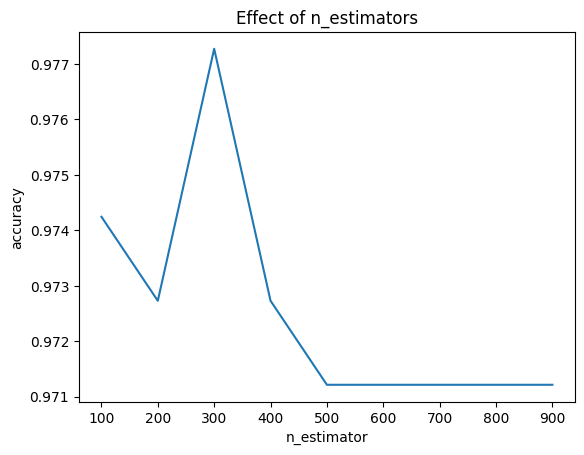

In [427]:
# Try different numbers of n_estimators
estimators = np.arange(100, 1000, 100)
accuracy = []

for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, Y_train)
    Y_pred=rf.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

In [428]:
print(accuracy)

[0.9742424242424242, 0.9727272727272728, 0.9772727272727273, 0.9727272727272728, 0.9712121212121212, 0.9712121212121212, 0.9712121212121212, 0.9712121212121212, 0.9712121212121212]


The accuracy is highest at 100

In [429]:
print('The accuracy score of Random Forest Classifier at 100 estimators is ', accuracy[8])

The accuracy score of Random Forest Classifier at 100 estimators is  0.9712121212121212


### Cross Validation

In [430]:
import statistics

cv_score_rf = cross_val_score(RandomForestClassifier(),X, Y, cv=40)
mean_cv_score_rf = statistics.mean(cv_score_rf)
print(mean_cv_score_rf)

0.9604406873614191


In [432]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       633
           1       0.72      0.48      0.58        27

    accuracy                           0.97       660
   macro avg       0.85      0.74      0.78       660
weighted avg       0.97      0.97      0.97       660



### Hyperparameter Tuning

In [413]:
param_grid = { 
	'n_estimators': [100, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [414]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_estimator_) 


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [416]:
model_grid = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=50) 
model_grid.fit(X_train, Y_train) 
y_pred_grid = rf.predict(X_test) 
print(classification_report(y_pred_grid, Y_test)) 


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       718
           1       0.24      0.65      0.35        17

    accuracy                           0.94       735
   macro avg       0.62      0.80      0.66       735
weighted avg       0.97      0.94      0.96       735

